In [22]:
import sys  
import logging
logging.basicConfig(format='%(asctime)s: %(levelname)s: %(message)s')
logging.root.setLevel(level=logging.INFO)
# logging.basicConfig(format='')
# logger = logging.getLogger('python')

print(sys.version  )
print(sys.version_info  )


3.5.2 (default, Nov 23 2017, 16:37:01) 
[GCC 5.4.0 20160609]
sys.version_info(major=3, minor=5, micro=2, releaselevel='final', serial=0)


$e^{ \frac days {half\ life\ days}}$
    

In [ ]:
### 2.41 

### 2.40 装饰器 decorator

python中装饰器其实就是一个参数为函数的函数，但利用编译器巧妙的工作实现装饰器的功能。这种实现方式也是函数化编程优势的一个很好体现，可以很方便的对已有代码进行一定的扩充，只需要在外面做一些标记，而不需要在原来的代码中进行改动，编译器在执行时会根据标记自动重写代码。

#### 不带参数的decorator

装饰器相当于，在原函数的外面包装了一层装饰器，真的非常巧妙。下面代码中，
```
test_f1 = decorator1(test_f1) 
```

In [2]:
def decorator1(func):
  def dec(*args):
    print('pre action')
    result = func(*args)
    print('post action')
    return result
  return dec
 
 
@decorator1
def test_f1(name):
  print(name)
  return None


test_f1('name1')
test_f1('name2')

pre action
name1
post action
pre action
name2
post action


#### 带参数的decorator

下面代码中

```
test_f1 = wap(‘f1’)(test_f1)
```

In [11]:
def wap(name):
    def decorator1(func):
        def dec(*args):
            print(name)
            print('pre action')
            result = func(*args)
            print('post action')
            return result
        return dec
    return decorator1
 
@wap('f1')
def test_f1(name):
    print(name)
    return None
 
@wap('f2')
def test_f2(name):
    print(name)
    return None
 
test_f1('name1') #out: f1/pre action/name1/post action
test_f2('name2') #out: f2/pre action/name2/post action

f1
pre action
name1
post action
f2
pre action
name2
post action


#### 函数decorator的叠加

下面代码中

```
test = decorator1(decorator2(test))
```


In [23]:
def decorator1(func):
    def dec(*args):
        print('d1 pre')
        result = func(*args)
        print('d1 post')
        return result
    return dec
 
def decorator2(func):
    def dec(*args):
        print('d2 pre')
        result = func(*args)
        print('d2 post')
        return result
    return dec
 
@decorator1
@decorator2
def test(name):
    print(name)
 
test('test')


d1 pre
d2 pre
test
d2 post
d1 post


#### 自己的例子

在日志中，经常需要添加分隔符，这样便于能够快速清晰的分辨代码。以前的方式会照成很多重复代码。

In [31]:
def line_separator(separator='-', length=50):
    separators = separator*length
    def decorator(func):
        def dec(*args):
            logging.info(separators)
            result = func(*args)
            return result
        return dec
    return decorator

 
@line_separator('-')
def test_f1(name):
    logging.info(name)
    return 'finish f1'
 
@line_separator('=')
def test_f2(name):
    logging.info(name)
    return 'finish f2'

@line_separator()
def test_f3(name):
    print(name)
    return 'finish f1'

test_f1('name1') 
test_f2('name2') 
test_f3('name2') 

2019-09-16 02:20:35,170: INFO: --------------------------------------------------
2019-09-16 02:20:35,171: INFO: name1
2019-09-16 02:20:35,171: INFO: ==================================================
2019-09-16 02:20:35,172: INFO: name2
2019-09-16 02:20:35,173: INFO: --------------------------------------------------


name2


'finish f1'

### 2.39 迭代器 Iterator

In [3]:
class MyNumbers:
  def __iter__(self):
    self.a = 1
    return self

  def __next__(self):
    if self.a <= 20:
      x = self.a
      self.a += 1
      return x
    else:
      raise StopIteration

myclass = MyNumbers()
myiter = iter(myclass)

for x in myiter:
  print(x)

1
2
3
4
5
6
7
8
9
10
11
12
13
14
15
16
17
18
19
20


In [4]:
class Triangle:
    def __init__(self, n):
        self.n = n
    
    def __iter__(self):
        self.i = 0
        self.j = self.i + 1
        return self

    def __next__(self):
        if self.i+1 < self.n:
            i = self.i
            j = self.j             
            if self.j+1 < self.n:
                self.j = self.j + 1
            else:
                self.i = self.i + 1
                self.j = self.i + 1
            return i,j
        else:
            raise StopIteration
            
triangle = Triangle(6)
iterator = iter(triangle)

for x in iterator:
    print(x)

(0, 1)
(0, 2)
(0, 3)
(0, 4)
(0, 5)
(1, 2)
(1, 3)
(1, 4)
(1, 5)
(2, 3)
(2, 4)
(2, 5)
(3, 4)
(3, 5)
(4, 5)


### 2.38 logging

三种logging定义的方式

In [3]:
import logging

# create logger
logger = logging.getLogger('simple_example')
logger.setLevel(logging.DEBUG)

# create console handler and set level to debug
ch = logging.StreamHandler()
ch.setLevel(logging.DEBUG)

# create formatter
formatter = logging.Formatter('%(asctime)s - %(name)s - %(levelname)s - %(message)s')

# add formatter to ch
ch.setFormatter(formatter)

# add ch to logger
logger.addHandler(ch)

# 'application' code
logger.debug('debug message')
logger.info('info message')
logger.warn('warn message')
logger.error('error message')
logger.critical('critical message')

2019-03-25 13:04:53,043 - simple_example - DEBUG - debug message
2019-03-25 13:04:53,045 - simple_example - INFO - info message
/usr/local/lib/python3.5/dist-packages/ipykernel_launcher.py:23: DeprecationWarning: The 'warn' method is deprecated, use 'warning' instead
2019-03-25 13:04:53,051 - simple_example - WARNING - warn message
2019-03-25 13:04:53,054 - simple_example - ERROR - error message
2019-03-25 13:04:53,057 - simple_example - CRITICAL - critical message


**fileConfig**

In [4]:
# 以下代码和上面的完全等效
import logging
import logging.config

logging.config.fileConfig('logging.conf')

# create logger
logger = logging.getLogger('simpleExample')

# 'application' code
logger.debug('debug message')
logger.info('info message')
logger.warning('warn message')
logger.error('error message')
logger.critical('critical message')
! cat logging.conf

2019-03-25 13:14:45,096 - simpleExample - DEBUG - debug message
2019-03-25 13:14:45,098 - simpleExample - INFO - info message
2019-03-25 13:14:45,100 - simpleExample - WARNING - warn message
2019-03-25 13:14:45,102 - simpleExample - ERROR - error message
2019-03-25 13:14:45,103 - simpleExample - CRITICAL - critical message


/usr/local/lib/python3.5/dist-packages/ipykernel_launcher.py:12: DeprecationWarning: The 'warn' method is deprecated, use 'warning' instead
  if sys.path[0] == '':


[loggers]
keys=root,simpleExample

[handlers]
keys=consoleHandler

[formatters]
keys=simpleFormatter

[logger_root]
level=DEBUG
handlers=consoleHandler

[logger_simpleExample]
level=DEBUG
handlers=consoleHandler
qualname=simpleExample
propagate=0

[handler_consoleHandler]
class=StreamHandler
level=DEBUG
formatter=simpleFormatter
args=(sys.stdout,)

[formatter_simpleFormatter]
format=%(asctime)s - %(name)s - %(levelname)s - %(message)s
datefmt=


**dictConfig**

In [5]:
# 以下代码和上面的完全等效
import logging
import logging.config
import yaml

with open('logging.yaml', 'r') as f:
    s = f.read()
    print(type(s))
    config = yaml.safe_load(s)

logging.config.dictConfig(config)

# create logger
logger = logging.getLogger('simpleExample')

# 'application' code
logger.debug('debug message')
logger.info('info message')
logger.warning('warn message')
logger.error('error message')
logger.critical('critical message')
! cat logging.yaml

<class 'str'>
2019-03-25 15:05:39,779 - simpleExample - DEBUG - debug message
2019-03-25 15:05:39,780 - simpleExample - INFO - info message
2019-03-25 15:05:39,781 - simpleExample - WARNING - warn message
2019-03-25 15:05:39,783 - simpleExample - ERROR - error message
2019-03-25 15:05:39,784 - simpleExample - CRITICAL - critical message
version: 1
formatters:
  simple:
    format: '%(asctime)s - %(name)s - %(levelname)s - %(message)s'
handlers:
  console:
    class: logging.StreamHandler
    level: DEBUG
    formatter: simple
    stream: ext://sys.stdout
loggers:
  simpleExample:
    level: DEBUG
    handlers: [console]
    propagate: no
root:
  level: DEBUG
  handlers: [console]


### 2.37 python logging性能比较【2019-03-14】

参见
- [python logging详解及自动添加上下文信息](https://www.cnblogs.com/xybaby/p/9197032.html)
- [日志的艺术（The art of logging）](https://www.cnblogs.com/xybaby/p/7954610.html)

以上这两篇文章写的非常好

In [1]:
import time
import logging

def test_log():
    logger = logging.getLogger('simple_example')
    logger.setLevel(logging.DEBUG)

    null = logging.NullHandler()
    logger.addHandler(null)

    begin = time.time()
    for i in range(100000):
        logger.debug('debug message')
        logger.info('info message')
        logger.warning('warn message')
        logger.error('error message')
        logger.critical('critical message')
    print('cost', time.time() - begin)


test_log()

cost 9.393593072891235


python logging模块的性能是较差的，不仅仅是Python语言的问题，更多的是logging模块的实现问题。

应用程序的每一条日志都会生成一个LogRecord对象，然后Formatter将其转换成string。由于LogRecord不知道Formatter需要用到哪些属性，所以干脆计算出所有的属性（见图一），这是eager evaluation，lazy evaluation应该更适合。也许Formatter只用到了%(message)s 属性，即只需要对logger.debug的输入参数求值即可，但是LogRecord还是会去反复计算线程id、进程id、应用程序的调用信息（文件、函数、行号），这些都是很耗的操作。

| What you don’t want to collect                | How to avoid collecting it                                                                                                                                                               |
|-----------------------------------------------|------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------|
| Information about where calls were made from. | Set logging._srcfile to None. This avoids calling sys._getframe(), which may help to speed up your code in environments like PyPy (which can’t speed up code that uses sys._getframe()). |
| Threading information.                        | Set logging.logThreads to 0.                                                                                                                                                             |
| Process information.                          | Set logging.logProcesses to 0.                                                                                                                                                           |

In [2]:
logging.logThreads = False          #由于python中，多线程对性能的帮助，非常有限，所以一般程序用单线程，多进程的方式。

test_log()

cost 8.8158860206604


logging为了线程安全，每个Handler都会持有一个互斥锁，每次写日志的时候都会获取锁，写完之后再释放锁。由于GIL的问题，多线程并不能给某些类型的python程序代码性能提升。

因此，如果应用程序能保证是单线程，那么可以设置  logging.thread = None  来避免使用锁，简单测试过也会有15%左右性能提升（实测，好像只有5%）.

In [3]:
logging.logThreads = False          
logging.logProcesses = False

test_log()

cost 8.617079019546509


In [4]:
logging.logThreads = False          #由于python中，多线程对性能的帮助，非常有限，所以一般程序用单线程，多进程的方式。
logging.logMultiprocessing = False
logging.logProcesses = False

test_log()

cost 8.150125741958618


In [5]:
logging._srcfile = None
logging.logThreads = False          #由于python中，多线程对性能的帮助，非常有限，所以一般程序用单线程，多进程的方式。
logging.logMultiprocessing = False
logging.logProcesses = False

test_log()

cost 6.804710388183594


### 2.36 \r, \n

print会自动进行换行。\r可以一般可以用于实现一些进度变化。

In [56]:
print('-'*30)
for i in range(10):
    print('{}\r'.format(i))
print('-'*30)    
for i in range(10):
    print('{}\n'.format(i))        
print('-'*30)    
for i in range(10):   
    sys.stdout.write('%d\r' % (i))
for i in range(10):   
    sys.stdout.write('%d\n' % (i))    

------------------------------
0
1
2
3
4
5
6
7
8
9
------------------------------
0

1

2

3

4

5

6

7

8

9

------------------------------
0
1
2
3
4
5
6
7
8
9


### 2.35 集合的一一对应

In [44]:
a = ['a', 'b', 'c', 'd']
b = [1, 2, 3, 4 ]
for i, j in zip(a, b):
    print(i, j)

a 1
b 2
c 3
d 4


### 2.34 python多线程

[为什么有人说 Python 的多线程是鸡肋呢？](https://www.zhihu.com/question/23474039/answers/updated )

CPU利用率并没有占满，大致相当于单核水平

In [ ]:
#coding=utf-8
from threading import Thread


def loop():
    while True:
        pass

if __name__ == '__main__':

    for i in range(3):
        t = Thread(target=loop)
        t.start()
    
    i=0
    while i<100:
        sleep(1)
        i=i+1
        pass



### 2.34 json 保存对象和加载对象

In [25]:
import json
text = json.dumps(['你好', {'bar': ('baz', None, 1.0, 2)}], ensure_ascii=False)
print(text)
print(json.loads(text))

obj = [('你好',1), ('中国',2)]
print(obj)
print(type(obj[0]))
text = json.dumps(obj, ensure_ascii=False)
print(text)
new_obj = json.loads(text)
print(new_obj)
print(type(new_obj[0]))
print(type(new_obj[0][0]), type(new_obj[0][1]))

["你好", {"bar": ["baz", null, 1.0, 2]}]
['你好', {'bar': ['baz', None, 1.0, 2]}]
[('你好', 1), ('中国', 2)]
<class 'tuple'>
[["你好", 1], ["中国", 2]]
[['你好', 1], ['中国', 2]]
<class 'list'>
<class 'str'> <class 'int'>



### 2.33 list去重


In [12]:
from functools import reduce
ids = [1,4,3,3,4,2,3,4,5,6,1]
func = lambda x,y:x if y in x else x + [y]
print([[], ] + ids)
reduce(func, [[], ] + ids)

[[], 1, 4, 3, 3, 4, 2, 3, 4, 5, 6, 1]


[1, 4, 3, 2, 5, 6]

### 2.32 trim函数——去除空格

In [ ]:
' Hello '.strip()

### 2.31 函数极值

Optimization terminated successfully.
         Current function value: 9.315586
         Iterations: 15
         Function evaluations: 30
Optimization terminated successfully.
         Current function value: -6.945823
         Iterations: 26
         Function evaluations: 52
[3.83745117]
[-1.3064375]
-1.306440096615395


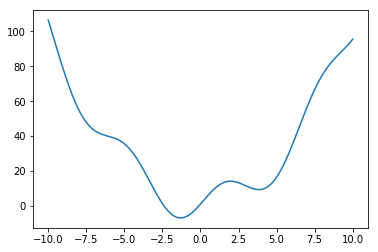

In [3]:
import numpy as np
from matplotlib import pyplot as plt
from scipy.optimize import fmin,fminbound
%matplotlib inline

def f(x):
    return x**2+10*np.sin(x)+1
x=np.linspace(-10,10,num=500)
min1=fmin(f,3) #求3附近的极小值
min2=fmin(f,0) #求0附近的极小值
min_global=fminbound(f,-10,10) #这个区域的最小值
print(min1)
print(min2)
print(min_global)
plt.plot(x,f(x))
plt.show()

Optimization terminated successfully.
         Current function value: -0.200000
         Iterations: 19
         Function evaluations: 38
Optimization terminated successfully.
         Current function value: -0.200000
         Iterations: 20
         Function evaluations: 40
[0.20002441]
[0.2]
0.19999999999999996
0.25


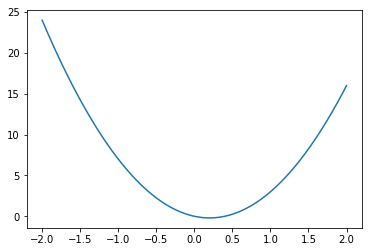

In [30]:

def f(x):
    return 5*x**2-2*x
x=np.linspace(-2,2,num=500)
min1=fmin(f,3) #求3附近的极小值
min2=fmin(f,0) #求0附近的极小值
min_global=fminbound(f,-2,2) #这个区域的最小值
print(min1)
print(min2)
print(min_global)
print(f(0.5))
plt.plot(x,f(x))
plt.show()

求函数最大值：  $f(x,y)=2xy+2x-x^{2}-2y^{2}$

带有约束条件：

1. $2x-y=0$
2. $y-1\geqslant0$

参考：

- [利用 SciPy 求解一些简单的最优化问题](https://www.jianshu.com/p/d577374047fb)
- [量化金融中常用的库 scipy](https://uqer.io/v3/community/share/54d83bb3f9f06c276f651a6e)：全面介绍，包含一些优化的方法

In [27]:
import numpy as np
from scipy.optimize import minimize

# 目标函数
def func(x):
    return -1.0*(2*x[0]*x[1] + 2*x[0] - x[0]**2 - 2*x[1]**2)

# 目标函数的导函数
def func_deriv(x):
    dfdx0 = -1.0*(-2*x[0] + 2*x[1] + 2)
    dfdx1 = -1.0*(2*x[0] - 4*x[1])
    return np.array([ dfdx0, dfdx1 ])

cons = ({'type': 'eq',
         'fun' : lambda x: np.array([2*x[0] - x[1]]),
         'jac' : lambda x: np.array([2.0, -1.0])},
        {'type': 'ineq',
         'fun' : lambda x: np.array([x[1] - 1]),
         'jac' : lambda x: np.array([0.0, 1.0])})

res = minimize(func, [-10.0,10.0], jac=func_deriv, constraints=cons,
               method='SLSQP', options={'disp': True})
print(res.fun)
print(res.success)
print(res.x)

Optimization terminated successfully.    (Exit mode 0)
            Current function value: 0.2500000000132587
            Iterations: 2
            Function evaluations: 2
            Gradient evaluations: 2
0.2500000000132587
True
[0.5 1. ]


1.9658475635152017


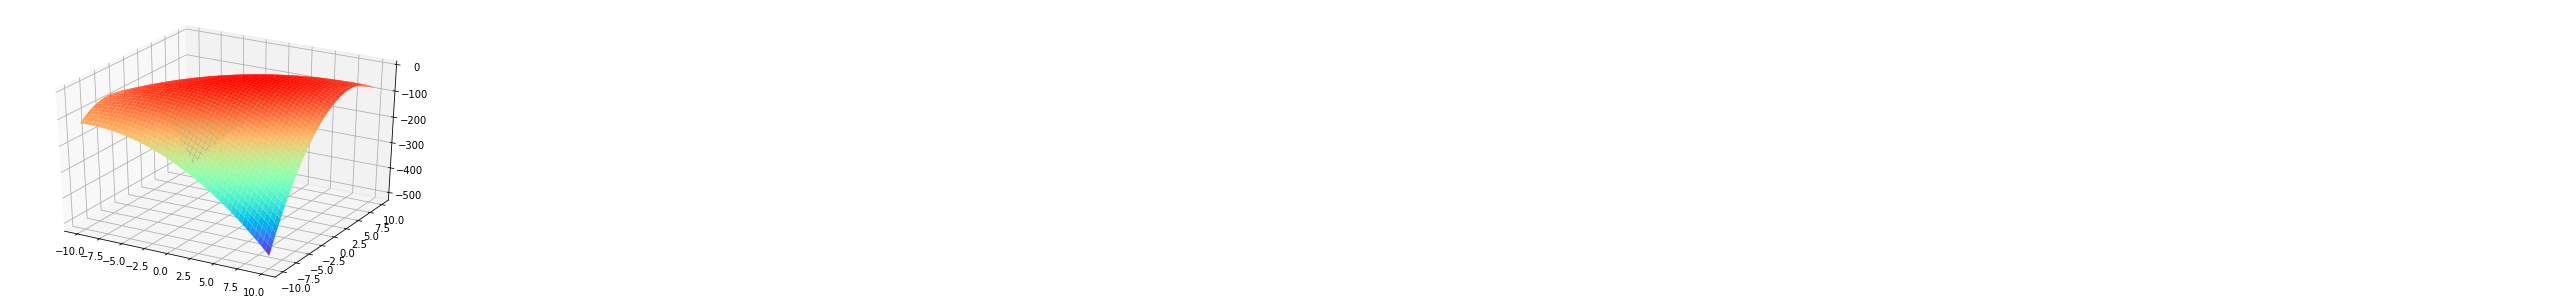

In [23]:
from matplotlib import pyplot as plt
import numpy as np
from mpl_toolkits.mplot3d import Axes3D

def f(x, y):
    return 2*x*y + 2*x - x*x - 2*y*y

X=np.linspace(-10,10,num=50)
Y=np.linspace(-10,10,num=50)

fig = plt.figure()
ax = Axes3D(fig)
X, Y = np.meshgrid(X, Y)
Z = f(X, Y)

print(np.max(Z))

# 具体函数方法可用 help(function) 查看，如：help(ax.plot_surface)
ax.plot_surface(X, Y, Z, rstride=1, cstride=1, cmap='rainbow')
plt.show()


### 2.30 交换矩阵的两行

下面是两种方法。

In [14]:
import numpy as np

a = np.array([[1,2,3],[2,3,4]])
print(a)
tmp = np.copy(a[0])
a[0] = a[1]
a[1] = tmp
print(a)


[[1 2 3]
 [2 3 4]]
[[2 3 4]
 [1 2 3]]


In [13]:
a = np.array([[1,2,3],[2,3,4]])
print(a)
a[[0,1], :] = a[[1,0], :]
print(a)

[[1 2 3]
 [2 3 4]]
[[2 3 4]
 [1 2 3]]


### 2.29 随机shuffle

In [1]:
import numpy as np

def random_indices(seed=None):
    if seed is not None:
        np.random.seed(seed=seed)
    indices = np.arange(10)
    np.random.shuffle(indices)
    print(indices)

random_indices() 
random_indices()
random_indices()
random_indices(10)
random_indices(10)
random_indices(10)

[2 0 1 9 7 8 6 4 3 5]
[8 6 2 9 7 1 0 4 5 3]
[5 6 2 4 0 8 1 7 9 3]
[8 2 5 6 3 1 0 7 4 9]
[8 2 5 6 3 1 0 7 4 9]
[8 2 5 6 3 1 0 7 4 9]


### 2.28 获得一个临时文件名

In [16]:
import tempfile

fd, filename = tempfile.mkstemp()   #返回的第一个是a file descriptor (integer)
print(fd, filename)

fd, filename =  tempfile.mkstemp(suffix='_tf', prefix='tmp_', dir='/root', text=False)
#If 'text' is specified and true, the file is opened in text mode.  Else (the default) the file is opened in binary mode.  
print(fd, filename)

! ls -l /root

80 /tmp/tmpxo5wypa6
82 /root/tmp_yfcwvi7r_tf
total 0
-rw-------. 1 root root 0 Oct  8 02:49 hen10ol_onbtf
-rw-------. 1 root root 0 Oct  8 02:51 hen4x1xd1ejtf
-rw-------. 1 root root 0 Oct  8 02:49 henb91ag26stf
-rw-------. 1 root root 0 Oct  8 07:24 tmp_7f7j2pzv_tf
-rw-------. 1 root root 0 Oct  8 02:52 tmp_rtfg48u6_tf
-rw-------. 1 root root 0 Oct  8 07:24 tmp_so9obdy2_tf
-rw-------. 1 root root 0 Oct  8 07:24 tmp_yfcwvi7r_tf


### 2.27 遍历dictionary

In [27]:

dict={"a":"apple","b":"banana","o":"orange"} 

for i in dict: 
    print("dict[%s]=" % i,dict[i])
    
print('-'*100)    
for k,v in dict.items(): 
    print("dict[%s]=" % k,v)     

print('-'*100)
d = {'a': 1, 'c': 3, 'b': 2, 'd': 4}
 
# d.viewitems()
for k in d.keys():
    print(k, d[k])

# 查看dictory 的key是否存在
dict['e'] =3 
print(dict)
if 'f' in dict:
    dict['f'] =dict['f']+1
else:
    dict['f'] =0
print(dict)
if 'f' in dict:
    dict['f'] =dict['f']+1
else:
    dict['f'] =0
print(dict)

print('-'*100) 
# 如果key不存在，返回默认值
dictionary = {"message": "Hello, World!"}
print(dictionary.get("message", "abc"))  # Hello, World!
print(dictionary.get("message1", "abc"))  #abc

dict[b]= banana
dict[o]= orange
dict[a]= apple
----------------------------------------------------------------------------------------------------
dict[b]= banana
dict[o]= orange
dict[a]= apple
----------------------------------------------------------------------------------------------------
b 2
d 4
c 3
a 1
{'b': 'banana', 'e': 3, 'o': 'orange', 'a': 'apple'}
{'b': 'banana', 'e': 3, 'o': 'orange', 'f': 0, 'a': 'apple'}
{'b': 'banana', 'e': 3, 'o': 'orange', 'f': 1, 'a': 'apple'}
----------------------------------------------------------------------------------------------------
Hello, World!
abc


### 2.27 创建目录，强制删除目录

In [68]:
import shutil
import os

temp_path = '/tmp/new_folder/abc/1234'
# delete old temp path and recreate it.
if os.path.exists(temp_path): shutil.rmtree(temp_path)
os.makedirs(temp_path)  #奇怪，这个命令失效了
                

### 2.26 格式化日期，时间输出

In [1]:
import time
print(time.localtime(time.time()))   #作用是格式化时间戳为本地的时间
print(time.strftime('%Y-%m-%d %H:%M:%S',time.localtime(time.time()))) 
print(time.strftime('%Y-%m-%d %H:%M:%S',time.localtime(time.time()))) 

import datetime
print(datetime.datetime.now().strftime('%Y-%m-%d %H:%M:%S.%f')[:-3])

time.struct_time(tm_year=2019, tm_mon=3, tm_mday=17, tm_hour=12, tm_min=55, tm_sec=15, tm_wday=6, tm_yday=76, tm_isdst=0)
2019-03-17 12:55:15
2019-03-17 12:55:15
2019-03-17 12:55:15.836


### 2.25 得到文件名



In [31]:
import os
inputFilepath = 'path/to/file/foobar.txt'
filename_w_ext = os.path.basename(inputFilepath)
print(filename_w_ext)
filename, file_extension = os.path.splitext(filename_w_ext)
#filename = foobar
#file_extension = .txt

path, filename = os.path.split("path/to/file/foobar.txt")
# path = path/to/file
# filename = foobar.txt

foobar.txt


### 2.24 Python 多核并行计算

[Python 多核并行计算](https://abcdabcd987.com/python-multiprocessing/)  
[Python并行编程 中文版](https://python-parallel-programmning-cookbook.readthedocs.io/zh_CN/latest/index.html) 一本书，内容详实。

In [25]:
import multiprocessing
import time
import sys

print( time.time())

def f(x):
    time.sleep(0.5)
    return x * x

pool = multiprocessing.Pool(processes=multiprocessing.cpu_count())
xs = range(20)

print('\n'+ '-'*100)
start_time = time.time()
for x in xs:
    print(f(x), end= "\t")
    # may be in any order
print('elasped time: {:.2f} seconds'.format(time.time()-start_time))   

# method 1: map
print('\n'+ '-'*100)
start_time = time.time()
print(pool.map(f, xs))  # prints [0, 1, 4, 9, 16]
print('elasped time: {:.2f} seconds'.format(time.time()-start_time))   

# method 2: imap
print('\n'+ '-'*100)
for y in pool.imap(f, xs):
    print(y, end= "\t")            # 0, 1, 4, 9, 16, respectively

# method 3: imap_unordered
print('\n'+ '-'*100)
start_time = time.time()
for y in pool.imap_unordered(f, xs):
    print(y, end= "\t")
    # may be in any order
print('elasped time: {:.2f} seconds'.format(time.time()-start_time))   


1553391463.8622286

----------------------------------------------------------------------------------------------------
0	1	4	9	16	25	36	49	64	81	100	121	144	169	196	225	256	289	324	361	elasped time: 10.81 seconds

----------------------------------------------------------------------------------------------------
[0, 1, 4, 9, 16, 25, 36, 49, 64, 81, 100, 121, 144, 169, 196, 225, 256, 289, 324, 361]
elasped time: 0.89 seconds

----------------------------------------------------------------------------------------------------
0	1	4	9	16	25	36	49	64	81	100	121	144	169	196	225	256	289	324	361	
----------------------------------------------------------------------------------------------------
0	1	4	9	16	25	36	49	289	64	81	100	121	144	196	169	225	361	256	324	elasped time: 0.96 seconds


In [43]:
# 增加进度条
pool = multiprocessing.Pool(processes=4)
xs = range(20)

def f(x):
    time.sleep(2)
    return x + 1

# 比较 imap，imap_unordered和map的性能差别。 为何和代码中提示不同，imap反而更快。
print('\n'+ '-'*100)
cnt = 0
start_time = time.time()
for y in pool.imap(f, xs):
    cnt += 1
    print(y, end= "\t")
    sys.stdout.write('done %d/%d\n' % (cnt, len(xs)))

print('elasped time: {:.2f} seconds'.format(time.time()-start_time)) 
print('cnt={}'.format(cnt))

print('\n'+ '-'*100)
cnt = 0
start_time = time.time()
for y in pool.imap_unordered(f, xs):
    cnt += 1
    print(y, end= "\t")
    sys.stdout.write('done %d/%d\r' % (cnt, len(xs)))

print('elasped time: {:.2f} seconds'.format(time.time()-start_time)) 
print('cnt={}'.format(cnt))


print('\n'+ '-'*100)
start_time = time.time()
pool.map(f, xs)
print('elasped time: {:.2f} seconds'.format(time.time()-start_time)) 
print('cnt={}'.format(cnt))



----------------------------------------------------------------------------------------------------
1	done 1/20
2	done 2/20
3	done 3/20
4	done 4/20
5	done 5/20
6	done 6/20
7	done 7/20
8	done 8/20
9	done 9/20
10	done 10/20
11	done 11/20
12	done 12/20
13	done 13/20
14	done 14/20
15	done 15/20
16	done 16/20
17	done 17/20
18	done 18/20
19	done 19/20
20	done 20/20
elasped time: 10.07 seconds
cnt=20

----------------------------------------------------------------------------------------------------
elasped time: 10.05 seconds
cnt=20

----------------------------------------------------------------------------------------------------
elasped time: 12.04 seconds
cnt=20


In [9]:
import multiprocessing
import time

def func(x):
    time.sleep(x)
    return x + 2
 
p = multiprocessing.Pool()
start = time.time()
for x in p.imap(func, [1,5,3]):
    print("{} {} (Time elapsed: {}s)".format(time.time(), x, int(time.time() - start)))    
    
start = time.time()
for x in p.map(func, [1,5,3]):
    print("{} {} (Time elapsed: {}s)".format(time.time(), x, int(time.time() - start)))    

1553351004.1742532 3 (Time elapsed: 1s)
1553351008.155019 7 (Time elapsed: 5s)
1553351008.1760623 5 (Time elapsed: 5s)
1553351013.3006668 3 (Time elapsed: 5s)
1553351013.3164318 7 (Time elapsed: 5s)
1553351013.3164928 5 (Time elapsed: 5s)


### 2.23 查询cpu个数

In [ ]:
import multiprocessing
multiprocessing.cpu_count()

### 2.22 Data streaming in Python: generators, iterators, iterables

使用generator，iterable，可以使用stream的方式来读取数据。

In [30]:
import time

#时间统计计算
def show_time(fun):
    start_time = time.time()
    print('starting')
    print(fun())
    print('elasped time: {:.2f} seconds'.format(time.time()-start_time))

numbers = range(100000)
 
# 以下两段代码速度差不多，但第二段，更加节省内存    
# Example 1, list comprehension. No streaming.
# First create an array of squares, then sum it.
# Note the inner array is simply looped over: no random access, just iteration.
# Wasteful, isn't it?
show_time(lambda : sum([n**2 for n in numbers]))

# Generator: square and sum one value after another
# No extra array created = lazily evaluated stream of numbers!
show_time(lambda : sum(n**2 for n in numbers))

starting
333328333350000
elasped time: 0.05 seconds
starting
333328333350000
elasped time: 0.04 seconds


**Generators, iterators, iterables **

generator一旦循环过一轮，就不能再用了。而iterable，可以反复循环。

In [31]:
generator = (word + '!' for word in 'baby let me iterate ya'.split())
# The generator object is now created, ready to be iterated over.
# No exclamation marks added yet at this point.
 
for val in generator: # real processing happens here, during iteration
    print(val, end=", ")

for val in generator:
    print(val, end=", ")
# Nothing printed! No more data, generator stream already exhausted above

class BeyonceIterable(object):
    def __iter__(self):
        """
        The iterable interface: return an iterator from __iter__().
 
        Every generator is an iterator implicitly (but not vice versa!),
        so implementing `__iter__` as a generator is the easiest way
        to create streamed iterables.
 
        """
        for word in 'baby let me iterate ya'.split():
            yield word + '!'  # uses yield => __iter__ is a generator
          
        
iterable = BeyonceIterable()

print("\n"+"-"*100)
for val in iterable:  # iterator created here
    print(val, end=", ")
     
print("\n"+"-"*100)        
for val in iterable:  # another iterator created here
    print(val, end=", ")

baby!, let!, me!, iterate!, ya!, 
----------------------------------------------------------------------------------------------------
baby!, let!, me!, iterate!, ya!, 
----------------------------------------------------------------------------------------------------
baby!, let!, me!, iterate!, ya!, 

### 2.21 numpy array查找

In [5]:
import numpy as np
x = np.arange(9.).reshape(3, 3)
print(x)
x[x > 5 ]


[[0. 1. 2.]
 [3. 4. 5.]
 [6. 7. 8.]]


array([6., 7., 8.])

### 2.20 遍历array，遍历最后一个层       [2018-07-18]

In [248]:
import numpy as np

a = np.array([1, 2, 3]).reshape(3,1)
print(a.reshape(3).shape )
for item in a:
    print('-'*50)
    print(item)
    
print('='*50)  
a = np.array([[1, 2, 3], [3, 4, 6]])
print(a, a.shape)
for item in a:
    print('-'*50)
    print(item)

print('='*50)    
a = np.array([[[1, 2, 3], [3, 9, 6], [1, 3, 9]], 
              [[2, 3, 10], [4, 8, 6],[2, 6, 7]]
             ])
print(a)
print('='*50)  
for item in a[:,:]:
    print('-'*50)
    print(item)
    
# 遍历最后一层
print('='*50)  
print(a[:,1])

print(np.unravel_index(np.argmax(a, axis=None), a.shape))   #获取最大值的，在矩阵中的坐标。


print(a.shape[-3])
print(a.reshape(-1, 3))
print(a.reshape((2, 3, 3)))
print(a.shape[:-2])

(3,)
--------------------------------------------------
[1]
--------------------------------------------------
[2]
--------------------------------------------------
[3]
[[1 2 3]
 [3 4 6]] (2, 3)
--------------------------------------------------
[1 2 3]
--------------------------------------------------
[3 4 6]
[[[ 1  2  3]
  [ 3  9  6]
  [ 1  3  9]]

 [[ 2  3 10]
  [ 4  8  6]
  [ 2  6  7]]]
--------------------------------------------------
[[1 2 3]
 [3 9 6]
 [1 3 9]]
--------------------------------------------------
[[ 2  3 10]
 [ 4  8  6]
 [ 2  6  7]]
[[3 9 6]
 [4 8 6]]
(1, 0, 2)
2
[[ 1  2  3]
 [ 3  9  6]
 [ 1  3  9]
 [ 2  3 10]
 [ 4  8  6]
 [ 2  6  7]]
[[[ 1  2  3]
  [ 3  9  6]
  [ 1  3  9]]

 [[ 2  3 10]
  [ 4  8  6]
  [ 2  6  7]]]
(2,)


### 2.19 top 10 in numpy array

In [190]:
import numpy as np
arr = np.array([1, 3, 2, 4, 5])
arr.argsort()[-3:][::-1]

array([4, 3, 1])

### 2.18 统计时间

In [167]:
import time
start_time = time.time()
time.sleep(3)
print('elasped time: {:.2f} seconds'.format(time.time()-start_time))

elasped time: 3.00 seconds


### 2.17 正则表达式 


(?iLmsux)：  
re.I,re.IGNORECASE	不区分大小写的匹配  
re.L,re.LOCALE		根据所使用的本地语言环境通过\w,\W,\b,\B,\s,\S实现匹配  
re.M,re.MULTILINE	^和$分别匹配目标字符串中行的起始和结尾，而不是严格匹配整个字符串本身的起始和结尾。  
re.S,re.DOTALL		"."(点号)通常匹配除了\n（换行符）之外的所有单个字符；该模式表示"."(点号)能够匹配全部字符。  
re.U,re.UNICODE    unicode格式  
re.X,re.VERBOSE		通过反斜线转义，否则所有空格加上#(以及在该行中所有后续文字)都被忽略，除非在一个字符串中或者允许注释并且提高可读性。  


[Python正则表达式指南](http://www.cnblogs.com/huxi/archive/2010/07/04/1771073.html)  
[Python正则表达式](https://wizardforcel.gitbooks.io/w3school-python/content/25.html)

In [6]:
import re

pattern = re.compile(r'hello')
match = pattern.match('hello world!')
if match:
    print(match.group())
print("-"*40)

m = re.match(r'(\w+) (\w+)(?P<sign>.*)', 'hello world!')
 
print("m.string:", m.string)
print("m.re:", m.re)
print("m.pos:", m.pos)
print("m.endpos:", m.endpos)
print("m.lastindex:", m.lastindex)
print("m.lastgroup:", m.lastgroup)
print("m.span():", m.span())
 
print("m.group(1,2):", m.group(1, 2))
print("m.groups():", m.groups())
print("m.groupdict():", m.groupdict())
print("m.start(2):", m.start(2))
print("m.end(2):", m.end(2))
print("m.span(2):", m.span(2))
print(r"m.expand(r'\2 \1\3'):", m.expand(r'\2 \1\3'))
print("-"*40)

# 查找
# 将正则表达式编译成Pattern对象 
# re.match只匹配字符串的开始，如果字符串开始不符合正则表达式，则匹配失败，函数返回None；而re.search匹配整个字符串，直到找到一个匹配。
pattern = re.compile(r'world') 
match = pattern.search('hello world!') 
if match: 
    print(match.group())    
print("-"*40)    

# 拆分
p = re.compile(r'\d+')
print(p.split('one1two2three3four4'))

# 替换
s = 'you are beautiful'
a = re.sub(' ', '-', s, 3)
print(a)
a = re.sub(' ', '-', s, 1)
print(a)
a = re.sub('a', 'p', s, 1)
print(a)
p = re.compile('a')
a = p.sub('p', s, 1)
print(a)

s = 'you are ${beautiful}'
a = re.sub('\${beautiful}', 'abc', s)
print(a)

hello
----------------------------------------
m.string: hello world!
m.re: re.compile('(\\w+) (\\w+)(?P<sign>.*)')
m.pos: 0
m.endpos: 12
m.lastindex: 3
m.lastgroup: sign
m.span(): (0, 12)
m.group(1,2): ('hello', 'world')
m.groups(): ('hello', 'world', '!')
m.groupdict(): {'sign': '!'}
m.start(2): 6
m.end(2): 11
m.span(2): (6, 11)
m.expand(r'\2 \1\3'): world hello!
----------------------------------------
world
----------------------------------------
['one', 'two', 'three', 'four', '']
you-are-beautiful
you-are beautiful
you pre beautiful
you pre beautiful
you are abc


In [50]:
s = 'you are beautiful\n may be bye bye \n ok hello \n let me see'
print(s)
print('-'*100)
print(re.sub('\n', ' ', s))
print(re.sub('\n', ' ', s).split())

you are beautiful
 may be bye bye 
 ok hello 
 let me see
----------------------------------------------------------------------------------------------------
you are beautiful  may be bye bye   ok hello   let me see
['you', 'are', 'beautiful', 'may', 'be', 'bye', 'bye', 'ok', 'hello', 'let', 'me', 'see']


In [163]:
token_pattern=r"(?u)\b\w+\b"
token_pattern=r"(?u)\S+"
sentence = "c# Delegate c++ is ++ a j++ language c++"
pattern = re.compile(token_pattern) 

start = 0
while True:
    match = pattern.search(sentence[start:]) 
    if match: 
        start = start + match.end()
        print(match.group(), start)
    else:
        break
        
print('-'*40)
stopword = 'language'
pattern = r'\b' + stopword + r'\b'
re.sub(pattern, 'lge', sentence)

c# 2
Delegate 11
c++ 15
is 18
++ 21
a 23
j++ 27
language 36
c++ 40
----------------------------------------


'c# Delegate c++ is ++ a j++ lge c++'

### 2.16 \__future\__ 的作用
在python2中， 我们有时会引用如下代码，在python2的环境下，超前使用python3的函数。下面代码意味在, from之后的代码中，使用python3的print函数。

from \__future\__ import print_function

以下代码如果在python2中运行，第五行会报错。 而如果在python3中运行，第一行就会报错。

In [5]:
print 'you are good'

from __future__ import print_function
print('you are good')
print 'you are good'

SyntaxError: invalid syntax (<ipython-input-5-fc7350af78a0>, line 5)

### 2.15 中文字符处理

[PYTHON-进阶-编码处理小结](http://wklken.me/posts/2013/08/31/python-extra-coding-intro.html)  
[字符编码笔记：ASCII，Unicode 和 UTF-8](http://www.ruanyifeng.com/blog/2007/10/ascii_unicode_and_utf-8.html)
 
在Python2中str采用的编码是utf-8，而在Python3中str采用的编码是unicode。


在pythoh3中由于采用unicode作为默认的编码，所以处理起来简单的多。而在python2中要小心的多。主要的方案是：

In [43]:
import locale, sys
print(sys.getdefaultencoding())    #系统默认编码
print(sys.getfilesystemencoding()) #文件系统编码
print(locale.getdefaultlocale())   #系统当前编码
print(sys.stdin.encoding)          #终端输入编码
print(sys.stdout.encoding)         #终端输出编码

utf-8
ascii
(None, None)
ANSI_X3.4-1968
UTF-8


而python2的输出如下：

ascii  
ANSI_X3.4-1968  
(None, None)  
None  
UTF-8  

In [32]:
s = '中文'
print(type(s), len(s))
print(s)
print('-----------------------------------------------')
s = u'中文'
print(type(s), len(s))
print(s)
print('-----------------------------------------------')
s = u'中文'.encode('utf-8')
print(type(s), len(s))
print(s)
print('-----------------------------------------------')
# print(isinstance(u'中文', unicode))   #python2中可以运行
# print(isinstance('中文', unicode))    #python2中可以运行
print(isinstance(u'中文', str))
print(isinstance('中文', str))
print('-----------------------------------------------')
# python2中，简单原则：不要对str使用encode，不要对unicode使用decode (事实上可以对str进行encode的，具体见最后，为了保证简单，不建议)
print('中文'.encode('utf-8'))   #python2中会报错 
# print(u'中文'.decode('utf-8'))  #python2。3中会报错 
print('-----------------------------------------------')
a = ['中文', 'ab']
print(a)        #python2中，显示的是 ['\xe4\xb8\xad\xe6\x96\x87', 'ab']
# print(str(a).decode('string_escape'))  # 仅仅python2中，用于显示中文数组， 显示为 ['中文', 'ab']

<class 'str'> 2
中文
-----------------------------------------------
<class 'str'> 2
中文
-----------------------------------------------
<class 'bytes'> 6
b'\xe4\xb8\xad\xe6\x96\x87'
-----------------------------------------------
True
True
-----------------------------------------------
b'\xe4\xb8\xad\xe6\x96\x87'
-----------------------------------------------
['中文', 'ab']


### 2.15 遍历array的最后一个维度（轴）numpy iterate over last dimension

In [171]:
import numpy 

def iterate(a):
    print("==================================================")
    print(a)
    for i in range(a.shape[-1]):
        print("---------------------------------------")
        print(a[...,i])
        
a = np.random.rand(3).reshape((3, 1))
b = np.random.rand(2, 3) 
c = np.random.rand(2, 3, 4) 
iterate(a)
iterate(b)
iterate(c)


    

[[0.73044509]
 [0.27014759]
 [0.29294452]]
---------------------------------------
[0.73044509 0.27014759 0.29294452]
[[0.89968995 0.35221895 0.54153394]
 [0.9759158  0.41950337 0.44051611]]
---------------------------------------
[0.89968995 0.9759158 ]
---------------------------------------
[0.35221895 0.41950337]
---------------------------------------
[0.54153394 0.44051611]
[[[0.04080854 0.12562058 0.29570428 0.69206746]
  [0.91077558 0.61572351 0.67470267 0.30838553]
  [0.80293343 0.45650736 0.39065108 0.74033627]]

 [[0.24643143 0.49878296 0.27830775 0.17745726]
  [0.59281915 0.54758264 0.90473864 0.83957742]
  [0.1436602  0.35531362 0.80006292 0.43050577]]]
---------------------------------------
[[0.04080854 0.91077558 0.80293343]
 [0.24643143 0.59281915 0.1436602 ]]
---------------------------------------
[[0.12562058 0.61572351 0.45650736]
 [0.49878296 0.54758264 0.35531362]]
---------------------------------------
[[0.29570428 0.67470267 0.39065108]
 [0.27830775 0.90473864

In [172]:
def last_row(a):
    s = a.shape
    if len(a.shape) == 2:
        print("---------------------------------------")
        print(a)
    else:
        for i in range(a.shape[0]):
            last_row(a[i])
            

print("==================================================")
last_row(a)
print("==================================================")
last_row(b)
print("==================================================")
last_row(c)    

---------------------------------------
[[0.73044509]
 [0.27014759]
 [0.29294452]]
---------------------------------------
[[0.89968995 0.35221895 0.54153394]
 [0.9759158  0.41950337 0.44051611]]
---------------------------------------
[[0.04080854 0.12562058 0.29570428 0.69206746]
 [0.91077558 0.61572351 0.67470267 0.30838553]
 [0.80293343 0.45650736 0.39065108 0.74033627]]
---------------------------------------
[[0.24643143 0.49878296 0.27830775 0.17745726]
 [0.59281915 0.54758264 0.90473864 0.83957742]
 [0.1436602  0.35531362 0.80006292 0.43050577]]


### 2.15 查看python对象内容

In [107]:
import inspect
def fun(a, b, c='abc', d=True):
    pass
inspect.getargspec(fun)
inspect.signature(fun)

/usr/local/lib/python3.5/dist-packages/ipykernel_launcher.py:4: DeprecationWarning: inspect.getargspec() is deprecated, use inspect.signature() instead
  after removing the cwd from sys.path.


<Signature (a, b, c='abc', d=True)>

### 2.14 dict and from collections import defaultdict

In [37]:
from collections import defaultdict
word = 'collections'
d = {character:i for i,character in enumerate(word)}

print(d)
print(d['e'])
# print(d['z'])  # throw KeyError: 'z'
print(d.get('z', 999))  

d1 = defaultdict(lambda : 999)
print(d1)
print(d1['e'])

{'n': 9, 'c': 5, 's': 10, 'i': 7, 'l': 3, 'o': 8, 'e': 4, 't': 6}
4
999
defaultdict(<function <lambda> at 0x7f461455cd08>, {})
999


### 2.13 同时获得list的value和index


In [6]:
word = 'collections'
print({character:i for i,character in enumerate(word)})
print({i:character for i,character in enumerate(word)})

{'l': 3, 'o': 8, 's': 10, 'e': 4, 'n': 9, 'i': 7, 'c': 5, 't': 6}
{0: 'c', 1: 'o', 2: 'l', 3: 'l', 4: 'e', 5: 'c', 6: 't', 7: 'i', 8: 'o', 9: 'n', 10: 's'}


### 2.12 collections模块的Counter类（计数器）

In [25]:
from collections import Counter
c = Counter('gallahad')  # 从一个可iterable对象（list、tuple、dict、字符串等）创建
print(c)
c = Counter(['what', 'do', 'you', 'like', 'to', 'do'])  # 从一个可iterable对象（list、tuple、dict、字符串等）创建
print(c)
print(len(c))

print('-'*100)  
print("遍历Counter")
for i in c:
    print(i, len(i))
for word, cnt in c.items():
    print(word, cnt)    
     
print('-'*100)        
print("可以支持float")
c = Counter({'red': 3.2, 'yellow': 2})    
c.update({'red':1.5, 'yellow':2.1})
print(c)
c.update(c)
print(c)

print('-'*100)    
print('遍历Counter的方法')
for i in c.items()  :
    print(i)
for i in dict(c).items()  :
    print(i)    
# print(list(c.elements()))
print(Counter())
freq = { key:value*0.1 for key, value in c.items()}
print(freq)

Counter({'a': 3, 'l': 2, 'g': 1, 'd': 1, 'h': 1})
Counter({'do': 2, 'what': 1, 'you': 1, 'like': 1, 'to': 1})
5
----------------------------------------------------------------------------------------------------
遍历Counter
what 4
do 2
you 3
like 4
to 2
what 1
do 2
you 1
like 1
to 1
----------------------------------------------------------------------------------------------------
可以支持float
Counter({'red': 4.7, 'yellow': 4.1})
Counter({'red': 9.4, 'yellow': 8.2})
----------------------------------------------------------------------------------------------------
遍历Counter的方法
('red', 9.4)
('yellow', 8.2)
('red', 9.4)
('yellow', 8.2)
Counter()
{'red': 0.9400000000000001, 'yellow': 0.82}


### 2.11 numpy array自带的迭代器

In [ ]:
np.array([2, 1, 3, 2, 0]).shape

### 2.10 one_hot

In [6]:
import numpy as np

target_vector = np.array([2, 1, 3, 2, 0, 3, 2])
one_hot = np.eye(4)[target_vector]
print(one_hot)
print(one_hot[0:1,])

[[0. 0. 1. 0.]
 [0. 1. 0. 0.]
 [0. 0. 0. 1.]
 [0. 0. 1. 0.]
 [1. 0. 0. 0.]
 [0. 0. 0. 1.]
 [0. 0. 1. 0.]]
[[0. 0. 1. 0.]]


### 2.9 python \__call__

[Python中的\__init__()和\__call__()函数](https://blog.csdn.net/Yaokai_AssultMaster/article/details/70256621)


 \__init__()  
在Python中，__init__()函数的意义等同于类的构造器（同理，\__del__()等同于类的析构函数）。因此，\__init__()方法的作用是创建一个类的实例。

\__call__()  
Python中的函数是一级对象。这意味着Python中的函数的引用可以作为输入传递到其他的函数/方法中，并在其中被执行。 
而Python中类的实例（对象）可以被当做函数对待。也就是说，我们可以将它们作为输入传递到其他的函数/方法中并调用他们，正如我们调用一个正常的函数那样。而类中__call__()函数的意义正在于此。为了将一个类实例当做函数调用，我们需要在类中实现__call__()方法。也就是我们要在类中实现如下方法：def  \__call__(self, *args)。这个方法接受一定数量的变量作为输入。 

假设x是X类的一个实例。那么调用x.__call__(1,2)等同于调用x(1,2)。这个实例本身在这里相当于一个函数。

In [21]:
class X(object):
    def __init__(self, a, b, range):
        self.a = a
        self.b = b
        self.range = range
        print('__init__ with （{}, {}, {}）'.format(self.a, self.b, self.range))
        
    def __call__(self, c, d):
        print('__call__ with （{}, {}, {}, {}）'.format(self.a, self.b, c, d))
        
    def hello():
        print("hello")
        
    #如果uncomment下面的函数，会有如下报错   
    #Exception ignored in: <bound method X.__del__ of <__main__.X object at 0x7f9a80b7ccf8>>
    #TypeError: __del__() missing 3 required positional arguments: 'a', 'b', and 'range'
#     def __del__(self, a, b, range):
#         del self.a
#         del self.b
#         del self.range
        
X(1, 2, 3)(1, 2)
# xInstance(1,2)        

__init__ with （1, 2, 3）
__call__ with （1, 2, 1, 2）


### 2.8 Python 变参

In [83]:
def save_ranking(*args):
    print(args) 
save_ranking('ming', 'alice', 'tom', 'wilson', 'roy')
# ['ming', 'alice', 'tom', 'wilson', 'roy']

('ming', 'alice', 'tom', 'wilson', 'roy')


In [85]:
def save_ranking(**kwargs):
    print(kwargs)
# abc = {second:'alice', fourth:'wilson', third:'tom'}    
save_ranking(first='ming', second='alice', fourth='wilson', third='tom', abc='123')
save_ranking(abc )

NameError: name 'second' is not defined

In [54]:
def save_ranking(*args, **kwargs):
    print(args)     
    print(kwargs)
save_ranking('ming', 'alice', 'tom', fourth='wilson', fifth='roy')     # ('ming', 'alice', 'tom')
# {'fourth': 'wilson', 'fifth': 'roy'}

('ming', 'alice', 'tom')
{'fourth': 'wilson', 'fifth': 'roy'}


In [56]:
from functools import reduce

primes = [2, 3, 5, 7, 11, 13]

def product(*numbers):
    p = reduce(lambda x, y: x * y, numbers)
    return p 

print(product(*primes))
# 30030

print(product(primes))
# [2, 3, 5, 7, 11, 13]

30030
[2, 3, 5, 7, 11, 13]


如果传入list给带*号的参数，必须要也要加上*，这样python会对这个list进行unpacking.  
Because the product() take the variable arguments, we need to unpack the our list data and pass it to that function. In this case, if we pass the primes as *primes, every elements of the primes list will be unpacked, then stored in list called numbers. If pass that list primes to the function without unpacking, the numbers will has only one primes list not all elements of primes.

In [59]:
numbers = [1, 2, 3, 4, 5, 6]

# The left side of unpacking should be list or tuple.
*a, = numbers
# a = [1, 2, 3, 4, 5, 6]
print(a)

*a, b = numbers
# a = [1, 2, 3, 4, 5]
# b = 6
print(a, b)

a, *b, = numbers
# a = 1 
# b = [2, 3, 4, 5, 6]
print(a, b)

a, *b, c = numbers
# a = 1
# b = [2, 3, 4, 5]
# c = 
print(a, b, c)

[1, 2, 3, 4, 5, 6]
[1, 2, 3, 4, 5] 6
1 [2, 3, 4, 5, 6]
1 [2, 3, 4, 5] 6


### 2.7 得到x, y之间所有的组合（一般用于画图） 

In [45]:
h = 0.1
x_min, x_max = -5, 5
y_min, y_max = -5, 5
xx, yy = np.meshgrid(np.arange(x_min, x_max, h), np.arange(y_min, y_max, h))

print(np.arange(x_min, x_max, h).shape)
print(np.arange(x_min, x_max, h).shape)
print(xx.ravel().shape)
print(yy.ravel().shape)
print(np.c_[xx.ravel(), yy.ravel()].shape)


(100,)
(100,)
(10000,)
(10000,)
(10000, 2)


### 2.6 tqdm－显示进度条

In [1]:
# ! pip install tqdm --proxy http://web-proxy.rose.hp.com:8080

from tqdm import tqdm
import time
 
pbar =  tqdm(range(100)) 
for i in pbar:
    time.sleep(0.1)
    pbar.set_description("Processing %s" % i)

for i in tqdm(range(100)):
    time.sleep(0.1)



100%|██████████| 100/100 [00:10<00:00,  9.84it/s]


In [2]:
pbar =  tqdm(total=100) 
for i in range(100):
    time.sleep(0.1)
    pbar.set_description("Processing %s" % (i+1))
    pbar.update(1)

Processing 100: 100%|██████████| 100/100 [00:10<00:00,  9.61it/s]

### 2.5 np.random.choice 根据一定概率，选择随机数

[numpy random](https://docs.scipy.org/doc/numpy/reference/routines.random.html)

In [26]:
import numpy as np
print(np.random.choice(5,  10, p=[0.1, 0, 0.3, 0.6, 0]))
p = np.array([0.1, 0, 0.3, 0.6, 0]).reshape((1, 5)).T
print(p.shape)
print(np.random.choice(5,  p=p.ravel()))

print(np.random.choice(5,  10))

[2 2 2 0 3 3 3 2 3 3]
(5, 1)
0
[1 1 1 1 0 1 3 4 2 1]


### 2.4 exlude one row from list(排除某一些行或列)

In [7]:
import numpy as np
x = np.array([[5, 3, 1, 4], [2, 2, 3, 4],  [1, 0, 5, 2], [1, 0, 5, 2], [5, 5, 1,1]])
y = np.array_split(x, 5)
print(y)
[elt for num, elt in enumerate(y) if not num == 1]

[array([[5, 3, 1, 4]]), array([[2, 2, 3, 4]]), array([[1, 0, 5, 2]]), array([[1, 0, 5, 2]]), array([[5, 5, 1, 1]])]


[array([[5, 3, 1, 4]]),
 array([[1, 0, 5, 2]]),
 array([[1, 0, 5, 2]]),
 array([[5, 5, 1, 1]])]

### 2.3 exlude one row from narray(排除某一些行或列)

In [92]:
import numpy as np
x = np.array([[5, 3, 1, 4], [2, 2, 3, 4],  [1, 0, 5, 2], [5, 5, 1,1]])
print(x)
#排除第二行
print(x[np.arange(x.shape[0])!=1])
#排除第二列
print(x[:, np.arange(x.shape[1])!=1])

[[5 3 1 4]
 [2 2 3 4]
 [1 0 5 2]
 [5 5 1 1]]
[[5 3 1 4]
 [1 0 5 2]
 [5 5 1 1]]
[[5 1 4]
 [2 3 4]
 [1 5 2]
 [5 1 1]]


### 2.2 unique（统计不同的值，并计算次数）

In [186]:
import numpy as np
x = np.array([1,1,1,2,2,2,5,5, 25, 5, 5, 5, 5, 1,1])
unique, counts = np.unique(x, return_counts=True)
print(np.asarray((unique, counts)).T)

#得到最大的label
print(np.argmax(counts))
unique[np.argmax(counts)]

[[ 1  5]
 [ 2  3]
 [ 5  6]
 [25  1]]
2


5

### 2.1 argsort（得到数据排序后的编号）

In [53]:
import numpy as np
x = np.array([3,0,6,1])
np.argsort(x)  

array([1, 3, 0, 2])

In [62]:
x = np.array([[5, 3, 1, 4], [2, 2, 3, 4]])
x

array([[5, 3, 1, 4],
       [2, 2, 3, 4]])

In [74]:
np.argsort(x[0,:])

array([2, 1, 3, 0])

In [63]:
np.argsort(x, axis=0)

array([[1, 1, 0, 0],
       [0, 0, 1, 1]])

In [64]:
np.argsort(x, axis=1)

array([[2, 1, 3, 0],
       [0, 1, 2, 3]])

#### Sorting with keys: 
不是非常理解

In [38]:
x = np.array([(1, 0), (0, 1)], dtype=[('x', '<i4'), ('y', '<i4')])
x

array([(1, 0), (0, 1)],
      dtype=[('x', '<i4'), ('y', '<i4')])

In [27]:
np.argsort(x, order=('x','y'))

array([1, 0])

In [28]:
np.argsort(x, order=('y','x'))

array([0, 1])

## 1 Python Numpy Tutorial
http://cs231n.github.io/python-numpy-tutorial/

#### # python的快速排序例子，不错

In [32]:
def quicksort(arr):
    if len(arr) <= 1:
        return arr
    pivot = arr[len(arr) // 2]
    left = [x for x in arr if x < pivot]
    middle = [x for x in arr if x == pivot]
    right = [x for x in arr if x > pivot]
    return quicksort(left) + middle + quicksort(right)

print(quicksort([3,6,8,10,1,2,1]))
# Prints "[1, 1, 2, 3, 6, 8, 10]"

[1, 1, 2, 3, 6, 8, 10]


#### 字符串左右对齐的功能不错

In [34]:
s = "hello"
print(s.capitalize())  # Capitalize a string; prints "Hello"
print(s.upper())       # Convert a string to uppercase; prints "HELLO"
print(s.rjust(7))      # Right-justify a string, padding with spaces; prints "  hello"
print(s.center(7))     # Center a string, padding with spaces; prints " hello "
print(s.replace('l', '(ell)'))  # Replace all instances of one substring with another;
                                # prints "he(ell)(ell)o"
print('  world '.strip())  # Strip leading and trailing whitespace; prints "world"

Hello
HELLO
  hello
 hello 
he(ell)(ell)o
world


In [35]:
# 遍历
# 希望访问list中每个element及其所在在index  
animals = ['cat', 'dog', 'monkey']
for idx, animal in enumerate(animals):
    print('#%d: %s' % (idx + 1, animal))
# Prints "#1: cat", "#2: dog", "#3: monkey", each on its own line

#1: cat
#2: dog
#3: monkey


In [32]:
# dictionary
d = {'cat': 'cute', 'dog': 'furry'}  # Create a new dictionary with some data
print(d['cat'])       # Get an entry from a dictionary; prints "cute"
print('cat' in d)     # Check if a dictionary has a given key; prints "True"
d['fish'] = 'wet'     # Set an entry in a dictionary
print(d['fish'])      # Prints "wet"
# print(d['monkey'])  # KeyError: 'monkey' not a key of d
print(d.get('monkey', 'N/A'))  # Get an element with a default; prints "N/A"
print(d.get('fish', 'N/A'))    # Get an element with a default; prints "wet"
del d['fish']         # Remove an element from a dictionary
print(d.get('fish', 'N/A')) # "fish" is no longer a key; prints "N/A"
d = {'person': 2, 'cat': 4, 'spider': 8}

e = {}
e[1]=3
print(e)


cute
True
wet
N/A
wet
N/A
{1: 3}


In [39]:
for animal in d:
    legs = d[animal]
    print('A %s has %d legs' % (animal, legs))
# Prints "A person has 2 legs", "A cat has 4 legs", "A spider has 8 legs"
d = {'person': 2, 'cat': 4, 'spider': 8}
for animal, legs in d.items():
    print('A %s has %d legs' % (animal, legs))
    
nums = [0, 1, 2, 3, 4]
even_num_to_square = {x: x ** 2 for x in nums if x % 2 == 0}
print(even_num_to_square)  # Prints "{0: 0, 2: 4, 4: 16}"    

A person has 2 legs
A spider has 8 legs
A cat has 4 legs
A person has 2 legs
A spider has 8 legs
A cat has 4 legs
{0: 0, 2: 4, 4: 16}


## SciPy
Numpy provides a high-performance multidimensional array and basic tools to compute with and manipulate these arrays. SciPy builds on this, and provides a large number of functions that operate on numpy arrays and are useful for different types of scientific and engineering applications.

In [51]:
# Image operations 图片操作： 读取，写入，变形
# !pip install imageio  --proxy https://web-proxy.rose.hp.com:8080
# !pip install  scikit-image  --proxy https://web-proxy.rose.hp.com:8080
import imageio
from skimage.transform import resize

# Read an JPEG image into a numpy array
img = imageio.imread('image/cat.jpg')
print(img.dtype, img.shape)  # Prints "uint8 (400, 248, 3)"

# We can tint the image by scaling each of the color channels
# by a different scalar constant. The image has shape (400, 248, 3);
# we multiply it by the array [1, 0.95, 0.9] of shape (3,);
# numpy broadcasting means that this leaves the red channel unchanged,
# and multiplies the green and blue channels by 0.95 and 0.9
# respectively.
img_tinted = img * [1, 0.95, 0.9]

# Resize the tinted image to be 300 by 300 pixels.
img_tinted = resize(img_tinted, (300, 300))

# Write the tinted image back to disk
imageio.imsave('image/cat_tinted.jpg', img_tinted)

uint8 (400, 248, 3)


/usr/local/lib/python3.5/dist-packages/skimage/transform/_warps.py:84: UserWarning: The default mode, 'constant', will be changed to 'reflect' in skimage 0.15.
  warn("The default mode, 'constant', will be changed to 'reflect' in "
/usr/local/lib/python3.5/dist-packages/imageio/core/util.py:104: UserWarning: Conversion from float64 to uint8, range [0.0, 255.0]
  'range [{2}, {3}]'.format(dtype_str, out_type.__name__, mi, ma))


显示两个图片在一行，show mutiple images side by side
<table>
<tr>
<td> ![cat](../../image/cat.jpg)  </td>
<td> ![cat_tinted](../../image/cat_tinted.jpg) </td>
</tr>
</table>

## 格式化输出numpy数组的小数显示

In [40]:
import numpy as np

np.set_printoptions(formatter={'float': lambda x: "{0:0.2f}".format(x)})

def softmax(Z):
    E = np.exp(Z)
    return E/np.sum(E, axis = 0, keepdims = True)

def sigmoid(Z):
    E = 1/np.exp(Z)
    return 1.0 / (1.0 + E)

print('{0}'.format(softmax([7, -7.5, 10])))
print('{0}'.format(sigmoid([7, -7.5, 10])))
print('{0}'.format(softmax([1,-2,0.5])))
# print('{0}'.format(np.round(softmax([7, -7.5, 10])), decimals=5))
# print('{0}'.format(np.round(sigmoid([7, -7.5, 10])), decimals=5))

[0.05 0.00 0.95]
[1.00 0.00 1.00]
[0.60 0.03 0.37]


## np.linalg.norm 

https://docs.scipy.org/doc/numpy-1.13.0/reference/generated/numpy.linalg.norm.html

In [5]:
import numpy as np
x = np.array([3, 4])
print(np.linalg.norm(x))
print(np.sqrt(np.sum(np.square(x))))

5.0
5.0


## 1. Juila, Cython and Numba

https://www.ibm.com/developerworks/cn/opensource/os-make-python-faster-julia/index.html

这篇文章比较了Juila的性能优势,如果Python采用Cython, Numba等方式编译，甚至能够得到更大的性能提高。

In [9]:
import numpy as np

def fib(n):
    if n<2:
        return n
    return fib(n-1)+fib(n-2)
%timeit fib(30)    #%timeit  统计时间的代码

292 ms ± 32.9 ms per loop (mean ± std. dev. of 7 runs, 1 loop each)


### 1.1 使用 Cython 编译

不知道为何无法运行成功

In [3]:
# 使用 Cython 编译
!pip install Cython #--proxy http://web-proxy.rose.hp.com:8080

%load_ext Cython

    100% |################################| 3.0MB 84kB/s eta 0:00:01


### 缓存计算
我们在保留 Python 任意精度的情况下能做得更好。fib 函数重复执行同一种计算许多次。例如，fib(20) 将调用 fib(19) 和 fib(18)。fib(19) 将调用 fib(18) 和 fib(17)。结果 fib(18) 被调用了两次。简单分析表明，fib(17) 将被调用 3 次，fib(16) 将被调用 5 次，等等。

In [1]:
from functools import lru_cache as cache
@cache(maxsize=None)
def fib_cache(n):
    if n<2:
        return n
    return fib_cache(n-1)+fib_cache(n-2)

%timeit fib_cache(30)

112 ns ± 0.0392 ns per loop (mean ± std. dev. of 7 runs, 10000000 loops each)


1

In [4]:
print("比最初的 Python 代码快约{}倍！".format(292/(110/1000)))

比最初的 Python 代码快约2654.5454545454545倍！


9

### 1.3 使用 Numba 编译

让我们使用另一个名为 Numba 的工具。它是针对部分 Python 版本的一个即时 (jit) 编译器。它不是对所有 Python 版本都适用，但在适用的情况下，它会带来奇迹。

In [ ]:
!pip install numba #--proxy http://web-proxy.rose.hp.com:8080

In [15]:
from numba import jit

@jit
def fib_seq_numba(n):
    if n < 2:
        return n
    (a,b) = (1,0)
    for i in range(n-1):
        (a,b) = (a+b,a)
    return a

%timeit fib_cache(30)

89.7 ns ± 0.806 ns per loop (mean ± std. dev. of 7 runs, 10000000 loops each)


In [16]:
print("比最初的 Python 代码快约{}倍！".format(292/(89.7/1000)))

比最初的 Python 代码快约3255.295429208473倍！


## Older

In [2]:
import numpy as np
a = np.array([[0.65, 0.28, 0.07], [0.15, 0.67, 0.18], [0.12, 0.36, 0.52]])


array([[ 0.65,  0.28,  0.07],
       [ 0.15,  0.67,  0.18],
       [ 0.12,  0.36,  0.52]])

In [20]:
print(a > 0.3)
print(np.sum(a>0.3))

[[ True False False]
 [False  True False]
 [False  True  True]]
4


In [185]:
a = np.array(
    [[[1, 2, 3, 4], [3, 4, 5, 6], [6, 7, 8, 9]],
     [[10, 11, 12, 13], [13, 14, 15, 16], [16, 17, 18, 19]]
    ]
    )
print(a)
print(a.reshape(a.shape[0], -1))
print(a.reshape(-1, a.shape[0]))
1.0/2*0.1
np.random.randn(2,4)

[[[ 1  2  3  4]
  [ 3  4  5  6]
  [ 6  7  8  9]]

 [[10 11 12 13]
  [13 14 15 16]
  [16 17 18 19]]]
[[ 1  2  3  4  3  4  5  6  6  7  8  9]
 [10 11 12 13 13 14 15 16 16 17 18 19]]
[[ 1  2]
 [ 3  4]
 [ 3  4]
 [ 5  6]
 [ 6  7]
 [ 8  9]
 [10 11]
 [12 13]
 [13 14]
 [15 16]
 [16 17]
 [18 19]]


array([[ 0.47724303,  0.2330421 , -0.5425071 ,  1.22917272],
       [-1.14369937,  1.43442646, -0.45713602,  0.30298751]])

In [54]:
import numpy as np
A = np.random.randn(4,3)
B = np.sum(A, axis = 1, keepdims = True)
print(A)
print(B)
print(np.sum(A, axis = 1, keepdims = False))
print(np.sum(A, axis = 0, keepdims = False).shape)


[[-0.31099082 -0.67392571  0.39563365]
 [-0.13360166  1.22020581  0.01565342]
 [ 0.36337367  0.37657246  0.14133009]
 [-0.59835471  0.25862004 -0.90435436]]
[[-0.58928289]
 [ 1.10225757]
 [ 0.88127622]
 [-1.24408903]]
[-0.58928289  1.10225757  0.88127622 -1.24408903]
(3,)


array([-0.31099082, -0.13360166,  0.36337367, -0.59835471])

In [24]:
A.reshape((3, -1))

array([[-1.36696524, -2.18569818, -0.80807384, -0.19325955],
       [-0.35207206,  0.32133859,  1.13348941, -1.09325212],
       [-0.00439771, -1.25861296, -0.02412861,  0.61763061]])

In [25]:
A.reshape(3, -1)

array([[-1.36696524, -2.18569818, -0.80807384, -0.19325955],
       [-0.35207206,  0.32133859,  1.13348941, -1.09325212],
       [-0.00439771, -1.25861296, -0.02412861,  0.61763061]])

In [160]:
a = [1, 2]
print(len(a))
print(np.int32(np.array(a)>1))

2
[0 1]


In [215]:
a = np.array([[1,2,2],[4,5,6]])
print(a.max()) #获取整个矩阵的最大值 结果： 6
print(a.min()) #结果：1

# 可以指定关键字参数axis来获得行最大（小）值或列最大（小）值
# axis=0 行方向最大（小）值，即获得每列的最大（小）值
# axis=1 列方向最大（小）值，即获得每行的最大（小）值
# 例如
print(a)
print(a.max(axis=0))
# 结果为 [4 5 6]

print(a.max(axis=1))
# 结果为 [3 6]

# 要想获得最大最小值元素所在的位置，可以通过argmax函数来获得
print('----------------------------')
a = np.array([[1,4,2, 5],[4,2,9, 4],[4,2, 7, 2]])
print(a)
print(a.shape)
print('----------------------------')
print(np.unravel_index(np.argmax(a, axis=None), a.shape))
print(a.argmax(axis=0))
print(a.argmax(axis=0).shape)
print('----------------------------')
print(a.size)

6
1
[[1 2 2]
 [4 5 6]]
[4 5 6]
[2 6]
----------------------------
[[1 4 2 5]
 [4 2 9 4]
 [4 2 7 2]]
(3, 4)
----------------------------
(1, 2)
[1 0 1 0]
(4,)
----------------------------
12


In [28]:
np.copy(a)

array([[1, 2, 2],
       [4, 5, 6]])

In [29]:
# 测试对象继承
class Animal(object):
    def get_speed(self):
        return 0
        
    def run(self):
        print("Animal run at "+ str(self.get_speed()))   
        
class Cat(Animal):
    def get_speed(self):  
        return np.sqrt(np.array(40))
              
cat = Cat()         
cat.run()
lion = Animal()         
lion.run()
print(type(np.sqrt(32)))
print(type(np.sqrt([40,45])))
print(type(np.array([40,45])))

Animal run at 6.32455532034
Animal run at 0
<class 'numpy.float64'>
<class 'numpy.ndarray'>
<class 'numpy.ndarray'>


In [10]:
a = 1
if a is None:
    print("i am none")
    
a =3 
b =a
b= 2
print("a={}, b={}".format(a, b))

a=3, b=2


In [31]:
A = np.random.randn(4,1)
print(A)
A[1]

[[-0.64995837]
 [-0.10506766]
 [ 0.97168085]
 [-0.84717388]]


array([-0.10506766])

In [32]:
A = np.random.randn(4,3)
print(A)
print(A[2,:])
print(A[:2, :-1])
print(A[0:,2])
print(A[:,2:3])
A[2, 2] = 10
print(A)
print(A[1:2,1:2].shape)
print(A[1:2,1:].shape)

A.flat[3]=4
print("A", A)

print("A[:,:-1]", A[:,:-1])
print("A[:,-1:]", A[:,-1:])

[[-1.65119275 -1.55271157 -0.38546726]
 [ 1.91550113  1.36525706  0.3589059 ]
 [ 1.62917173  0.37161111  1.45797612]
 [-1.7638759  -0.66725509  0.7857922 ]]
[ 1.62917173  0.37161111  1.45797612]
[[-1.65119275 -1.55271157]
 [ 1.91550113  1.36525706]]
[-0.38546726  0.3589059   1.45797612  0.7857922 ]
[[-0.38546726]
 [ 0.3589059 ]
 [ 1.45797612]
 [ 0.7857922 ]]
[[ -1.65119275  -1.55271157  -0.38546726]
 [  1.91550113   1.36525706   0.3589059 ]
 [  1.62917173   0.37161111  10.        ]
 [ -1.7638759   -0.66725509   0.7857922 ]]
(1, 1)
(1, 2)
A [[ -1.65119275  -1.55271157  -0.38546726]
 [  4.           1.36525706   0.3589059 ]
 [  1.62917173   0.37161111  10.        ]
 [ -1.7638759   -0.66725509   0.7857922 ]]
A[:,:-1] [[-1.65119275 -1.55271157]
 [ 4.          1.36525706]
 [ 1.62917173  0.37161111]
 [-1.7638759  -0.66725509]]
A[:,-1:] [[ -0.38546726]
 [  0.3589059 ]
 [ 10.        ]
 [  0.7857922 ]]


In [33]:
np.random.permutation(20)

array([ 4, 17,  8,  2, 18, 12,  0, 15,  1,  7, 10,  3, 11,  5, 14,  9,  6,
       19, 16, 13])

In [34]:
for i in range(10):
    print(i)
print(i)    

0
1
2
3
4
5
6
7
8
9
9


In [35]:
A = np.random.randn(1,5)
print(A)
print(A[:, 3:5].shape)
print(A[:, 3:].shape)

[[-0.45433472  0.38371429 -1.34311892 -0.11534776  0.67886362]]
(1, 2)
(1, 2)


### numpy.ravel() vs numpy.flatten()

#### 相同

In [41]:
x = np.array([[1, 2], [3, 4]])
print(x)
print(x.flatten())
print(x.ravel())

#  两者默认均是行序优先
print(x.flatten('F'))
print(x.ravel('F'))

print(x.reshape(-1))
print(x.T.reshape(-1))
print(x.shape)

[[1 2]
 [3 4]]
[1 2 3 4]
[1 2 3 4]
[1 3 2 4]
[1 3 2 4]
[1 2 3 4]
[1 3 2 4]
(2, 2)


#### 区别

In [42]:
x = np.array([[1, 2], [3, 4]])
x.flatten()[1] = 100     # flatten：返回的是拷贝
print(x)
x.ravel()[1] = 100
print(x)
print(x.min(), x.max())


x = np.random.rand(3, 5)
print(x)
print("-----------------------")
print(np.mean(x, keepdims=True))
print(np.mean(x, axis=1, keepdims=True))
print(np.std(x, axis=1, keepdims=True))
print((x - np.mean(x, axis=1, keepdims=True)))
print((x - np.mean(x, axis=1, keepdims=True))/np.std(x, axis=1, keepdims=True))

[[1 2]
 [3 4]]
[[  1 100]
 [  3   4]]
1 100
-----------------------
[[0.5]
 [1. ]
 [0.5]
 [1. ]
 [1. ]]
-----------------------
[[0.88148813 0.45920457 0.60319014 0.21819803 0.39798897]
 [0.82190451 0.9326201  0.09190508 0.271112   0.48453687]
 [0.96177029 0.63892388 0.9141109  0.33819249 0.59958339]]
-----------------------
[[0.57431529]]
[[0.51201397]
 [0.52041571]
 [0.69051619]]
[[0.22223528]
 [0.31870643]
 [0.2274361 ]]
[[ 0.36947416 -0.0528094   0.09117617 -0.29381594 -0.114025  ]
 [ 0.3014888   0.41220439 -0.42851063 -0.24930372 -0.03587884]
 [ 0.2712541  -0.05159231  0.22359471 -0.3523237  -0.0909328 ]]
[[ 1.66253607 -0.23762832  0.41026867 -1.32209408 -0.51308234]
 [ 0.94597652  1.29336701 -1.34453085 -0.78223623 -0.11257645]
 [ 1.19266067 -0.22684309  0.98311001 -1.54911068 -0.3998169 ]]


In [169]:
x = np.array([1])
x
np.arange(0,1,0.01)
np.linspace(0, 1, num=21)

array([ 0.  ,  0.05,  0.1 ,  0.15,  0.2 ,  0.25,  0.3 ,  0.35,  0.4 ,
        0.45,  0.5 ,  0.55,  0.6 ,  0.65,  0.7 ,  0.75,  0.8 ,  0.85,
        0.9 ,  0.95,  1.  ])

In [67]:
x = np.arange(24).reshape((2,3,4))
print(x)
y = x.reshape(-1, 3)
print(y)
y[y>5]

[[[ 0  1  2  3]
  [ 4  5  6  7]
  [ 8  9 10 11]]

 [[12 13 14 15]
  [16 17 18 19]
  [20 21 22 23]]]
[[ 0  1  2]
 [ 3  4  5]
 [ 6  7  8]
 [ 9 10 11]
 [12 13 14]
 [15 16 17]
 [18 19 20]
 [21 22 23]]


array([ 6,  7,  8,  9, 10, 11, 12, 13, 14, 15, 16, 17, 18, 19, 20, 21, 22,
       23])

### 协方差矩阵和相关系数矩阵

In [108]:
def my_cov(x):
    x1 = x - np.mean(x, axis = 1, keepdims = True)
    return np.dot(x1, x1.T)/(x.shape[1]-1)

def my_corrcoef(x):
    x1 = x - np.mean(x, axis = 1, keepdims = True)
    x2 = np.sqrt(np.sum(np.power(x1, 2), axis = 1, keepdims = True))
    x = x1/x2
    return np.dot(x, x.T)

x = np.array([[0, 2], [1, 1], [2, 0]]).T 
print(x)
print(np.cov(x))
print(my_cov(x))
print(np.corrcoef(x))
print(my_corrcoef(x))

[[0 1 2]
 [2 1 0]]
[[ 1. -1.]
 [-1.  1.]]
[[ 1. -1.]
 [-1.  1.]]
[[ 1. -1.]
 [-1.  1.]]
[[ 1. -1.]
 [-1.  1.]]


In [109]:
x = [-2.1, -1,  4.3]  
y = [3,  1.1,  0.12]  
X = np.vstack((x,y))  
print(X)
print(np.cov(X))
print(np.cov(x, y))
print(my_cov(X))
print(np.corrcoef(X))
print(my_corrcoef(X))

[[-2.1  -1.    4.3 ]
 [ 3.    1.1   0.12]]
[[ 11.71        -4.286     ]
 [ -4.286        2.14413333]]
[[ 11.71        -4.286     ]
 [ -4.286        2.14413333]]
[[ 11.71        -4.286     ]
 [ -4.286        2.14413333]]
[[ 1.         -0.85535781]
 [-0.85535781  1.        ]]
[[ 1.         -0.85535781]
 [-0.85535781  1.        ]]


### np.pad 
常用语卷积神经网络中，填充边界

https://docs.scipy.org/doc/numpy-1.13.0/reference/generated/numpy.pad.html

In [126]:
import numpy as np
arr3D = np.array([[[1, 1, 2, 2, 3, 4], [1, 1, 2, 2, 3, 4], [1, 1, 2, 2, 3, 4]], 
                  [[0, 1, 2, 3, 4, 5], [0, 1, 2, 3, 4, 5], [0, 1, 2, 3, 4, 5]], 
                  [[1, 1, 2, 2, 3, 4], [1, 1, 2, 2, 3, 4], [1, 1, 2, 2, 3, 4]]])
print(arr3D)
print('constant:  \n' + str(np.pad(arr3D, ((0, 0), (1, 1), (2, 2)), 'constant')))
print('edge:  \n' + str(np.pad(arr3D, ((0, 0), (1, 1), (2, 2)), 'edge')))
print('linear_ramp:  \n' + str(np.pad(arr3D, ((0, 0), (1, 1), (2, 2)), 'linear_ramp')))
  

[[[1 1 2 2 3 4]
  [1 1 2 2 3 4]
  [1 1 2 2 3 4]]

 [[0 1 2 3 4 5]
  [0 1 2 3 4 5]
  [0 1 2 3 4 5]]

 [[1 1 2 2 3 4]
  [1 1 2 2 3 4]
  [1 1 2 2 3 4]]]
constant:  
[[[0 0 0 0 0 0 0 0 0 0]
  [0 0 1 1 2 2 3 4 0 0]
  [0 0 1 1 2 2 3 4 0 0]
  [0 0 1 1 2 2 3 4 0 0]
  [0 0 0 0 0 0 0 0 0 0]]

 [[0 0 0 0 0 0 0 0 0 0]
  [0 0 0 1 2 3 4 5 0 0]
  [0 0 0 1 2 3 4 5 0 0]
  [0 0 0 1 2 3 4 5 0 0]
  [0 0 0 0 0 0 0 0 0 0]]

 [[0 0 0 0 0 0 0 0 0 0]
  [0 0 1 1 2 2 3 4 0 0]
  [0 0 1 1 2 2 3 4 0 0]
  [0 0 1 1 2 2 3 4 0 0]
  [0 0 0 0 0 0 0 0 0 0]]]
edge:  
[[[1 1 1 1 2 2 3 4 4 4]
  [1 1 1 1 2 2 3 4 4 4]
  [1 1 1 1 2 2 3 4 4 4]
  [1 1 1 1 2 2 3 4 4 4]
  [1 1 1 1 2 2 3 4 4 4]]

 [[0 0 0 1 2 3 4 5 5 5]
  [0 0 0 1 2 3 4 5 5 5]
  [0 0 0 1 2 3 4 5 5 5]
  [0 0 0 1 2 3 4 5 5 5]
  [0 0 0 1 2 3 4 5 5 5]]

 [[1 1 1 1 2 2 3 4 4 4]
  [1 1 1 1 2 2 3 4 4 4]
  [1 1 1 1 2 2 3 4 4 4]
  [1 1 1 1 2 2 3 4 4 4]
  [1 1 1 1 2 2 3 4 4 4]]]
linear_ramp:  
[[[0 0 0 0 0 0 0 0 0 0]
  [0 0 1 1 2 2 3 4 2 0]
  [0 0 1 1 2 2 3 4 2 0]
  [0 0 1 1 

In [127]:
print('maximum:  \n' + str(np.pad(arr3D, ((0, 0), (1, 1), (2, 2)), 'maximum')))
print('mean:  \n' + str(np.pad(arr3D, ((0, 0), (1, 1), (2, 2)), 'mean')))
print('median:  \n' + str(np.pad(arr3D, ((0, 0), (1, 1), (2, 2)), 'median')))
print('minimum:  \n' + str(np.pad(arr3D, ((0, 0), (1, 1), (2, 2)), 'minimum')))


maximum:  
[[[4 4 1 1 2 2 3 4 4 4]
  [4 4 1 1 2 2 3 4 4 4]
  [4 4 1 1 2 2 3 4 4 4]
  [4 4 1 1 2 2 3 4 4 4]
  [4 4 1 1 2 2 3 4 4 4]]

 [[5 5 0 1 2 3 4 5 5 5]
  [5 5 0 1 2 3 4 5 5 5]
  [5 5 0 1 2 3 4 5 5 5]
  [5 5 0 1 2 3 4 5 5 5]
  [5 5 0 1 2 3 4 5 5 5]]

 [[4 4 1 1 2 2 3 4 4 4]
  [4 4 1 1 2 2 3 4 4 4]
  [4 4 1 1 2 2 3 4 4 4]
  [4 4 1 1 2 2 3 4 4 4]
  [4 4 1 1 2 2 3 4 4 4]]]
mean:  
[[[2 2 1 1 2 2 3 4 2 2]
  [2 2 1 1 2 2 3 4 2 2]
  [2 2 1 1 2 2 3 4 2 2]
  [2 2 1 1 2 2 3 4 2 2]
  [2 2 1 1 2 2 3 4 2 2]]

 [[2 2 0 1 2 3 4 5 2 2]
  [2 2 0 1 2 3 4 5 2 2]
  [2 2 0 1 2 3 4 5 2 2]
  [2 2 0 1 2 3 4 5 2 2]
  [2 2 0 1 2 3 4 5 2 2]]

 [[2 2 1 1 2 2 3 4 2 2]
  [2 2 1 1 2 2 3 4 2 2]
  [2 2 1 1 2 2 3 4 2 2]
  [2 2 1 1 2 2 3 4 2 2]
  [2 2 1 1 2 2 3 4 2 2]]]
median:  
[[[2 2 1 1 2 2 3 4 2 2]
  [2 2 1 1 2 2 3 4 2 2]
  [2 2 1 1 2 2 3 4 2 2]
  [2 2 1 1 2 2 3 4 2 2]
  [2 2 1 1 2 2 3 4 2 2]]

 [[2 2 0 1 2 3 4 5 2 2]
  [2 2 0 1 2 3 4 5 2 2]
  [2 2 0 1 2 3 4 5 2 2]
  [2 2 0 1 2 3 4 5 2 2]
  [2 2 0 1 2 3 4 5 2 

In [ ]:
print('reflect:  \n' + str(np.pad(arr3D, ((0, 0), (1, 1), (2, 2)), 'reflect')))
print('symmetric:  \n' + str(np.pad(arr3D, ((0, 0), (1, 1), (2, 2)), 'symmetric')))
print('wrap:  \n' + str(np.pad(arr3D, ((0, 0), (1, 1), (2, 2)), 'wrap')))  

In [128]:
np.floor(1.1)

1.0

### ‘翻转’180， 先左右翻转，然后上下翻转

In [138]:
import numpy as np
a = np.arange(25).reshape((5, 5))
print(a)
print("---------------------------------------------------")
print(a[::-1])    #左右翻转
print("---------------------------------------------------")
print(a.T[::-1])   #上下翻转
print("---------------------------------------------------")
print(a[::-1].T[::-1])   #左右翻转后上下翻转


[[ 0  1  2  3  4]
 [ 5  6  7  8  9]
 [10 11 12 13 14]
 [15 16 17 18 19]
 [20 21 22 23 24]]
---------------------------------------------------
[[20 21 22 23 24]
 [15 16 17 18 19]
 [10 11 12 13 14]
 [ 5  6  7  8  9]
 [ 0  1  2  3  4]]
---------------------------------------------------
[[ 4  9 14 19 24]
 [ 3  8 13 18 23]
 [ 2  7 12 17 22]
 [ 1  6 11 16 21]
 [ 0  5 10 15 20]]
---------------------------------------------------
[[24 19 14  9  4]
 [23 18 13  8  3]
 [22 17 12  7  2]
 [21 16 11  6  1]
 [20 15 10  5  0]]


In [162]:
 2*0.8*0.666667 /(0.8+0.666667)

0.7272729256197896

### 加载文件

In [12]:
import numpy as np
data = np.loadtxt("./data/sin_line.txt", delimiter="\t")
print(data.shape)
data

(200, 2)


array([[ 0.067732,  3.176513],
       [ 0.42781 ,  3.816464],
       [ 0.995731,  4.550095],
       [ 0.738336,  4.256571],
       [ 0.981083,  4.560815],
       [ 0.526171,  3.929515],
       [ 0.378887,  3.52617 ],
       [ 0.033859,  3.156393],
       [ 0.132791,  3.110301],
       [ 0.138306,  3.149813],
       [ 0.247809,  3.476346],
       [ 0.64827 ,  4.119688],
       [ 0.731209,  4.282233],
       [ 0.236833,  3.486582],
       [ 0.969788,  4.655492],
       [ 0.607492,  3.965162],
       [ 0.358622,  3.5149  ],
       [ 0.147846,  3.125947],
       [ 0.63782 ,  4.094115],
       [ 0.230372,  3.476039],
       [ 0.070237,  3.21061 ],
       [ 0.067154,  3.190612],
       [ 0.925577,  4.631504],
       [ 0.717733,  4.29589 ],
       [ 0.015371,  3.085028],
       [ 0.33507 ,  3.44808 ],
       [ 0.040486,  3.16744 ],
       [ 0.212575,  3.364266],
       [ 0.617218,  3.993482],
       [ 0.541196,  3.891471],
       [ 0.045353,  3.143259],
       [ 0.126762,  3.114204],
       [

### 张量(tensor) broadcasting

In [23]:
a = np.random.randn(2, 2, 3, 1)
b = np.random.randn(2, 2, 3, 4)
c = a * b # shape of c will be (19*19, 5, 80
print(a.shape, b.shape, c.shape)
print(a)
print(b)
print("------------------------------------------------------------------------")
print(c)
print("------------------------------------------------------------------------")
print(np.argmax(c, axis=-1).shape)
print(np.argmax(c, axis=-1))
print(np.max(c, axis=-1))

(2, 2, 3, 1) (2, 2, 3, 4) (2, 2, 3, 4)
[[[[-0.1204414 ]
   [ 0.05477318]
   [ 1.55013489]]

  [[ 1.65185281]
   [ 0.86930207]
   [-0.37684728]]]


 [[[ 1.21888968]
   [ 1.35501029]
   [-1.49031411]]

  [[-0.92154106]
   [ 0.71248538]
   [ 1.86770353]]]]
[[[[-2.0531236  -0.6910499  -0.94944975  0.90386899]
   [-0.83826804  0.72562675  0.22247822 -0.55030069]
   [-1.36358515 -0.08862487  0.38823841  0.25681631]]

  [[-3.2108792   0.9353094  -0.71008985 -1.58287425]
   [-0.5065701   2.33938561  0.68468899 -0.91488986]
   [-1.29845777 -0.77506561  0.0786534  -1.14892817]]]


 [[[-0.9593349  -0.35185835 -0.51313543 -1.25194292]
   [ 0.53740241 -1.55213255  0.13814627 -0.70471397]
   [-0.13741889  0.15619856 -1.332687   -0.95535398]]

  [[-2.80885418 -0.64668042  1.1388053   0.34641153]
   [ 0.10714146 -0.69329845  0.53316471 -0.78036284]
   [ 0.78489394 -1.3286155  -0.31824311  2.56722342]]]]
------------------------------------------------------------------------
[[[[ 0.24728108  0.0832310